In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("log.csv", index_col=0)

In [3]:
shorthands = {
    "Legendary Grandmaster": "LGM",
    "International Grandmaster": "IGM",
    "Grandmaster": "GM",
    "International Master": "IM",
    "Master": "M",
    "Candidate Master": "CM",
    "Expert" : "E",
    "Specialist": "S",
    "Pupil": "P",
    "Newbie": "N"
}
rank_colors = ["black", "red", "orange", "purple", "blue", "teal", "green", "gray"]

In [4]:
for full, short in shorthands.items():
    df.replace(full, short, inplace=True)

In [5]:
df.head()

,position,handle,rating,rank_from,index_from,rank_to,index_to
0,9,Um_nik,3392,LGM,0,S,7
1,11,Kevin114514,3377,LGM,0,S,7
2,13,heuristica,3373,LGM,0,IM,3
3,14,LJC00118,3330,LGM,0,S,7
4,16,turmax,3276,LGM,0,CM,5


In [6]:
higher = df[df["index_from"] > df["index_to"]]
lower = df[df["index_from"] < df["index_to"]]

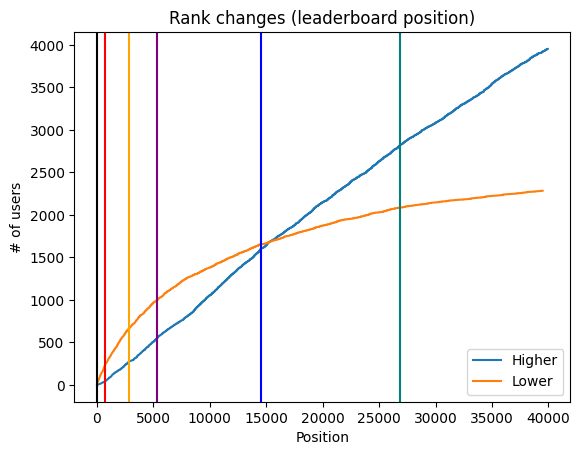

In [7]:
plt.plot(higher["position"], np.arange(len(higher)) + 1)
plt.plot(lower["position"], np.arange(len(lower)) + 1)
plt.axvline(df[df["rating"] >= 3000].max()["position"], color="black")
plt.axvline(df[df["rating"] >= 2400].max()["position"], color="red")
plt.axvline(df[df["rating"] >= 2100].max()["position"], color="orange")
plt.axvline(df[df["rating"] >= 1900].max()["position"], color="purple")
plt.axvline(df[df["rating"] >= 1600].max()["position"], color="blue")
plt.axvline(df[df["rating"] >= 1400].max()["position"], color="teal")
plt.xlabel("Position")
plt.ylabel("# of users")
plt.title("Rank changes (leaderboard position)")
plt.legend(["Higher", "Lower"])
plt.show()

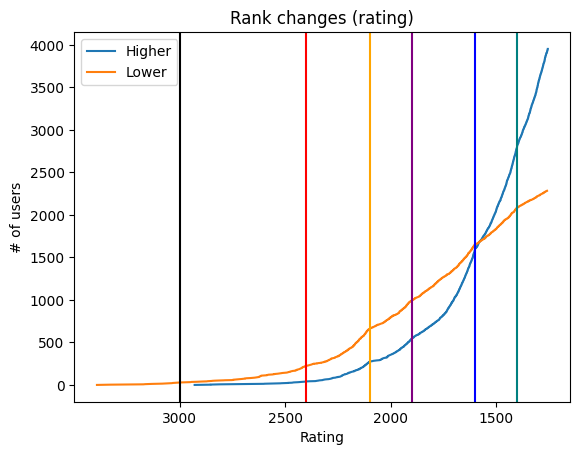

In [8]:
plt.plot(higher["rating"], np.arange(len(higher)) + 1)
plt.plot(lower["rating"], np.arange(len(lower)) + 1)
plt.axvline(3000, color="black")
plt.axvline(2400, color="red")
plt.axvline(2100, color="orange")
plt.axvline(1900, color="purple")
plt.axvline(1600, color="blue")
plt.axvline(1400, color="teal")
plt.gca().invert_xaxis()
plt.xlabel("Rating")
plt.ylabel("# of users")
plt.title("Rank changes (rating)")
plt.legend(["Higher", "Lower"])
plt.show()

In [9]:
positive_diff = df[np.cumsum(np.sign(df["index_to"] - df["index_from"])) >= 0]
cutoff = positive_diff.loc[positive_diff.last_valid_index()]["rating"]
cutoff

1579

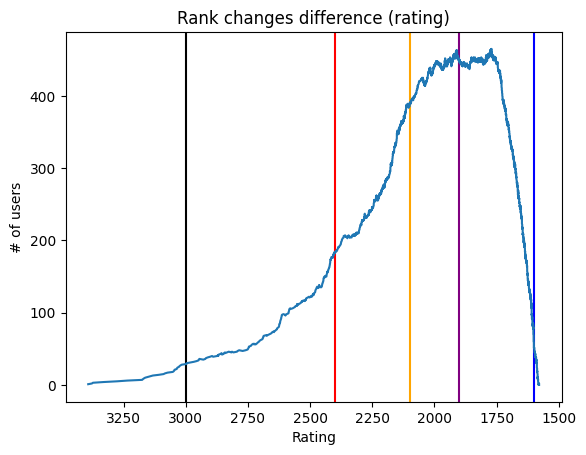

In [10]:
df_head = df[df["rating"] >= cutoff]
plt.axvline(3000, color="black")
plt.axvline(2400, color="red")
plt.axvline(2100, color="orange")
plt.axvline(1900, color="purple")
plt.axvline(1600, color="blue")
plt.plot(df_head["rating"], np.cumsum(np.sign(df_head["index_to"] - df_head["index_from"])))
plt.gca().invert_xaxis()
plt.xlabel("Rating")
plt.ylabel("# of users")
plt.title("Rank changes difference (rating)")
plt.show()

In [11]:
df_colors_grouped = df
df_colors_grouped.replace("M", "M+IM", inplace=True)
df_colors_grouped.replace("IM", "M+IM", inplace=True)
df_colors_grouped.replace("GM", "GM+IGM", inplace=True)
df_colors_grouped.replace("GM", "GM+IGM", inplace=True)
shorthands_grouped = ['LGM', 'GM+IGM', 'M+IM', 'CM', 'E', 'S', 'P', 'N']

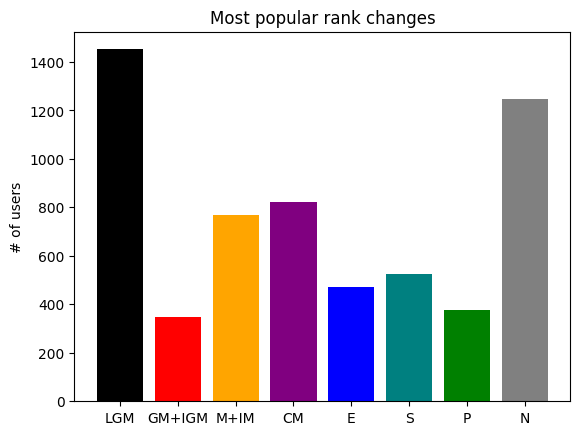

In [12]:
counts = df_colors_grouped["rank_to"].value_counts()
plt.bar(shorthands_grouped, [counts[rank] for rank in shorthands_grouped], color=rank_colors)
plt.ylabel("# of users")
plt.title("Most popular rank changes")
plt.show()

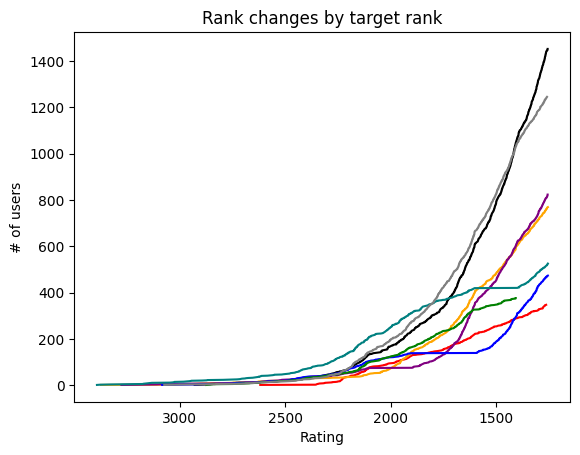

In [13]:
for rank, color in zip(shorthands_grouped, rank_colors):
    df_this_rank = df_colors_grouped[df_colors_grouped["rank_to"] == rank]
    plt.plot(df_this_rank["rating"], np.arange(len(df_this_rank)) + 1, color=color)
plt.gca().invert_xaxis()
plt.xlabel("Rating")
plt.ylabel("# of users")
plt.title("Rank changes by target rank")
plt.show()